In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_wos = pd.read_csv('webofscience_publicationsperyear.tsv', index_col=0, sep='\t').iloc[:-1]
df_wos.index = pd.to_datetime(df_wos.index, format='%Y')
df_wos.sort_index(inplace=True)

In [3]:
df_wos.head()

,records,% of 8850
Publication Years,,
1970-01-01,17.0,0.192
1971-01-01,28.0,0.316
1972-01-01,24.0,0.271
1973-01-01,20.0,0.226
1974-01-01,27.0,0.305


In [4]:
df = pd.read_csv('Scopus-10808-Analyze-Year.csv',skiprows=6).set_index('YEAR')
df.index = pd.to_datetime(df.index, format='%Y')
df.sort_index(inplace=True)
df.columns = ['Articles']
df = df.Articles

In [5]:
df.head()

YEAR
1925-01-01    1
1928-01-01    1
1934-01-01    1
1940-01-01    1
1941-01-01    1
Name: Articles, dtype: int64

In [24]:
total_dblp = pd.read_csv('dblp_publicationsperyear.csv', sep=';').groupby('Year').sum()
total_dblp.index = pd.to_datetime(total_dblp.index, format='%Y')
total_dblp.sort_index(inplace=True)
total_dblp = total_dblp['#Publications']

In [25]:
total_dblp

Year
1936-01-01        12
1937-01-01        15
1938-01-01        11
1939-01-01        18
1940-01-01        10
               ...  
2017-01-01    329179
2018-01-01    361579
2019-01-01    399059
2020-01-01    390922
2021-01-01     53519
Name: #Publications, Length: 86, dtype: int64

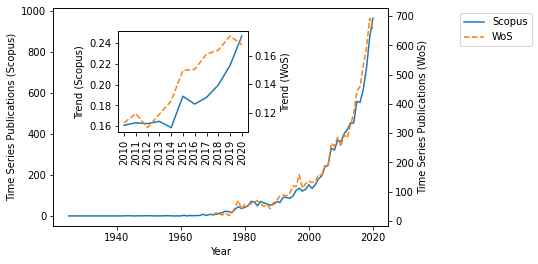

In [26]:
fig, ax1 = plt.subplots(figsize=(6,4))
h1, = ax1.plot(df[:'2020-12-31'].index, df[:'2020-12-31'].values, color='C0')
ax1r = ax1.twinx()
h1r, = ax1r.plot(df_wos[:'2020-12-31'].index, df_wos[:'2020-12-31'].records, color='C1', linestyle='--')

ax1.legend([h1,h1r],['Scopus','WoS'], bbox_to_anchor=(1.2,1), loc="upper left")

left, bottom, width, height = [0.275, 0.45, 0.3, 0.35]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.tick_params(axis='x', labelrotation=90)
trend = 100*(df / total_dblp)['2010-01-01':'2020-12-31']
trend_wos = 100*(df_wos.records / total_dblp)['2010-01-01':'2020-12-31']
h2, = ax2.plot(trend.index, trend.values, color='C0', label='trend')
ax2r = ax2.twinx()
h2r, = ax2r.plot(trend_wos.index, trend_wos.values, color='C1', linestyle='--')

#ax2.legend([h2,h2r],['trend (Scopus)', 'trend (Wos)'], bbox_to_anchor=(0,1.5), loc="upper left")

ax1.set_ylabel('Time Series Publications (Scopus)')
ax1r.set_ylabel('Time Series Publications (WoS)')
ax2.set_ylabel('Trend (Scopus)')
ax2r.set_ylabel('Trend (WoS)')
ax1.set_xlabel('Year')

plt.savefig('../latex/images/documents-distribution-scopus.pdf', bbox_inches='tight')